In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Read in the cuisine_ingredients csv file
column_names = ["cuisine", "recipe", "ingredients", "full_ingredients", "image_url"]
df = pd.read_csv("cuisine_ingredients.csv", names=column_names, encoding='utf-16')

# Overview of the dataset
df.sample(20, random_state=1)

,cuisine,recipe,ingredients,full_ingredients,image_url
3403,Italian,Leek risotto with parmesan crisps,"['leeks', 'butter', 'tarragon', 'arborio rice'...","['2 medium leeks, sliced', 'thick slice of but...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
589,British,Chicken pie,"['butter', 'flour', 'chicken stock', 'double c...","['2 tbsp butter, plus extra for frying', '1 he...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1404,British,Easy sage and onion stuffing,"['onions', 'sage', 'breadcrumbs', 'butter', 'p...","['4 large onions', '10 sage leaves', '125g/¼lb...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1195,British,Pear crumble,"['plain flour', 'butter', 'cinnamon', 'demerar...","['75g/3oz plain flour', '75g/3oz butter, cold,...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
3248,Italian,Chicken Marsala,"['chicken breasts', 'plain flour', 'butter', '...","['4 chicken breasts, skin removed', '40g/1½oz ...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1840,Caribbean,Jerk chicken with pomegranate rice,"['chicken breasts', 'chicken breasts', 'onion'...","['4 part-boned chicken breasts, skin on (subst...",NaN
3060,Indian,Tandoori chicken skewers,"['chicken thigh', 'yoghurt', 'curry powder', '...","['450g/1lb chicken thigh fillets, trimmed of f...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
372,British,Paul Hollywood's Arctic roll,"['sunflower oil', 'ice cream', 'raspberry jam'...","['a little sunflower oil, for greasing', '500m...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
2635,French,Vegan French toast with berries,"['maple syrup', 'vanilla extract', 'white brea...","['400g/14oz can organic chickpeas', '1 tsp map...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1123,British,The Hairy Bikers' fish pie with cheese mash,"['milk', 'onion', 'white fish', 'butter', 'pla...","['400ml/14fl oz whole milk', '1 small onion, t...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cuisine           4724 non-null   object
 1   recipe            4724 non-null   object
 2   ingredients       4724 non-null   object
 3   full_ingredients  4724 non-null   object
 4   image_url         2515 non-null   object
dtypes: object(5)
memory usage: 184.7+ KB


There are 4724 rows in the dataset. At a glance, there are no null values in cuisine, recipe, ingredients, and full_ingredients columns, while there are quite a few null values in the image_url column.

In [4]:
# Drop duplicated rows if any
df.drop_duplicates(inplace=True)
df.shape

(4724, 5)

There are no duplicated rows.

In [5]:
# Check uniqueness of each column's values
for col in df.columns:
    print(col, "is unique:", df[col].is_unique)

cuisine is unique: False
recipe is unique: False
ingredients is unique: False
full_ingredients is unique: True
image_url is unique: False


It appears that one recipe name can have different sets of full ingredients.

> When web-scraping the data, I've decided to scrape both streamlined ingredients (with green-highlighted hyperlinks to the ingredients' sites) and the full ingredient list (with the quantity of each ingredient and sometimes with some simple preparation steps) as illustrated in the below image. The full ingredient list will be more comprehensive but require more cleaning. To check which feature (ingredients vs. full_ingredients) should be used for the Natural Language Processing pipeline, we'll do some EDA on these variables like checking minimum and maximum numbers of characters in column ingredients to identify any outlier.

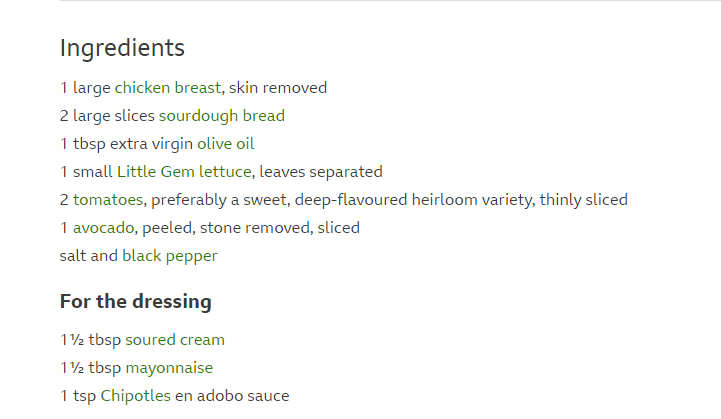
<div style="text-align: right"> (Image source: https://www.bbc.co.uk/food/recipes/californian_sourdough_59703) </div>

In [6]:
# Snapshot of some ingredient text
df.full_ingredients.sample(20, random_state=2)

3727    ['olive oil, for shallow and deep frying', '1 ...
1923    ['1 tbsp groundnut oil', '6 long dried chillie...
3552    ['2 tbsp sunflower oil ', '12 rashers thick ri...
1146    ['140g/5oz butter', '100g/3½oz jumbo oats', '1...
3195    ['250g/9oz 00 flour', '3-4 medium free-range e...
1643    ['675g/1½lb floury potatoes, peeled and cut in...
3054    ['150ml/5fl oz Greek-style yoghurt ', '½ small...
842     ['300g/10oz dried yellow split peas', '50g/2oz...
505     ['4kg/9lb beef shin, on the bone', 'sea salt a...
2224    ['650g/1lb 7oz celeriac, peeled and sliced int...
130     ['400g/14oz beef mince', '50g/1¾oz oatmeal ', ...
2341    ['30g/1oz butter, plus extra for buttering sou...
1284    ['3-4 tbsp vegetable oil', '150g/5oz streaky b...
278     ['200g/7oz dried haricot beans', '1 onion, fin...
3436    ['500g/1lb 2oz frozen mixed berries', '50g/1¾o...
258     ['455g/1lb granulated sugar', '1 tbsp liquid g...
2624    ['50g/1¾oz unsalted butter ', '150g/5½oz carro...
2289    ['600m

At glance, each ingredient for a recipe in the full_ingredients column can be splitted by `',`. We can't simply split by `,` because an ingredient can be accompanied by some preparation steps also seperated by `,`. Additionally, due to the nature of text, either `'` or `"` can exist within one ingredient text. Hence, either `"` or `'` can be used to wrap around an ingredient text to seperate it from another in the ingredient list. To overcome this, I'll apply some regular expression operations to seperate individual ingredients.

In [7]:
# Check the max and min number of ingredients of a recipe in the "ingredients" column

ingredient_check = df.ingredients.apply(lambda x: re.split("\', | \",", x)).apply(len)
print(f"Maximum number of ingredients in the 'ingredients' column in a recipe: {ingredient_check.max()}")
print(f"Minimum number of ingredients in the 'ingredients' column in a recipe: {ingredient_check.min()}")

Maximum number of ingredients in the 'ingredients' column in a recipe: 56
Minimum number of ingredients in the 'ingredients' column in a recipe: 1


In [8]:
# Check the max and min number of ingredients of a recipe in the "full_ingredients" column

full_ingredients_check = df.full_ingredients.apply(lambda x: re.split("\', | \",", x)).apply(len)
print(f"Maximum number of ingredients in the 'full_ingredients' column in a recipe: {full_ingredients_check.max()}")
print(f"Minimum number of ingredients in the 'full_ingredients' column in a recipe: {full_ingredients_check.min()}")

Maximum number of ingredients in the 'full_ingredients' column in a recipe: 60
Minimum number of ingredients in the 'full_ingredients' column in a recipe: 1


It seems rare that a recipe has only one ingredient. Let's visualise the number of ingredients distribution in both the "ingredients" and "full_ingredients" columns.

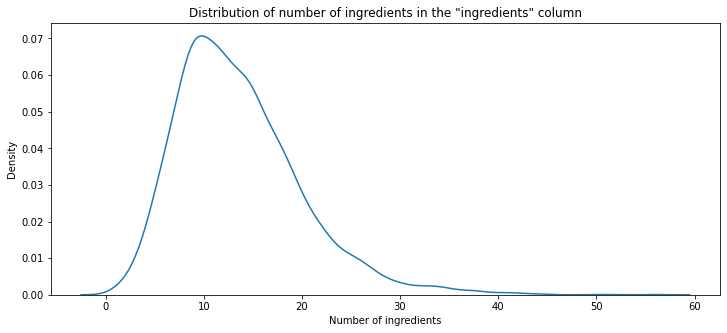

count    4724.000000
mean       13.583827
std         6.348777
min         1.000000
25%         9.000000
50%        13.000000
75%        17.000000
max        56.000000
Name: ingredients, dtype: float64

In [9]:
plt.figure(figsize=(12,5))
sns.kdeplot(ingredient_check)
plt.title('Distribution of number of ingredients in the "ingredients" column')
plt.xlabel('Number of ingredients')
plt.ylabel('Density')
plt.show()
ingredient_check.describe()

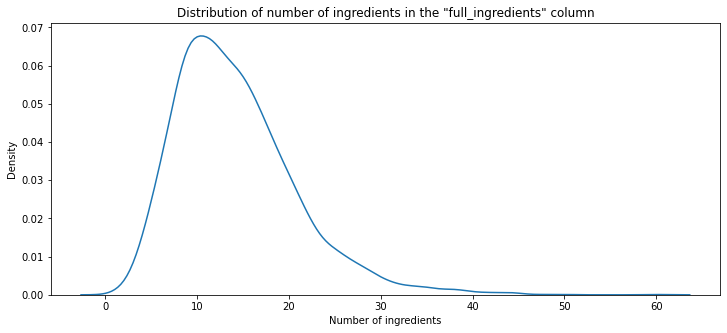

count    4724.000000
mean       14.206605
std         6.588256
min         1.000000
25%         9.000000
50%        13.000000
75%        18.000000
max        60.000000
Name: full_ingredients, dtype: float64

In [10]:
plt.figure(figsize=(12,5))
sns.kdeplot(full_ingredients_check)
plt.title('Distribution of number of ingredients in the "full_ingredients" column')
plt.xlabel('Number of ingredients')
plt.ylabel('Density')
plt.show()
full_ingredients_check.describe()

The distributions of the number of ingredients between the columns are quite synced. Both are skewed right and unimodal. Most recipes have about 10 ingredients. To examine the possible outliers, we'll investigate recipes with less than 3 ingredients or more than 45 ingredients in either the "ingredients" column or the "full_ingredients" column.

In [11]:
df[(ingredient_check < 3) | (ingredient_check > 45) | (full_ingredients_check > 45) | (
    full_ingredients_check < 3)][["cuisine", "recipe", "ingredients", "full_ingredients"]]

,cuisine,recipe,ingredients,full_ingredients
513,British,Brandy snap baskets with orange cream,"['double cream', 'orange']","['8 brandy snap baskets', '450ml/16fl oz doubl..."
1106,British,Mince pie ice cream,"['mince pies', 'ice cream']","['leftover mince pies', 'vanilla ice cream']"
1152,British,Onion chutney bread rolls,"['salt', 'yeast']",['500g/1lb 2oz unbleached strong white bread f...
1203,British,Roast potatoes,['King Edward'],"['floury potatoes, such as Cara or King Edward..."
1216,British,Pigs in blankets,"['bacon', 'sausages']","['8 thin slices streaky bacon', '16 chipolata ..."
1335,British,Roast chestnuts,['chestnuts'],['1kg/2¼lb chestnuts']
1357,British,Easy roast potatoes,"['potatoes', 'olive oil']","['1kg/2½lb floury potatoes, such as Maris Pipe..."
1564,British,Steak and kidney pudding with onion gravy,"['kidneys', 'flour', 'vegetable oil', 'red win...","['700g/1½lb stewing steak, cut into large chun..."
1585,British,Sticky toffee pudding,[],"['175g/6oz dates, chopped', '1 rounded tsp bic..."
1622,British,Summer pudding loaf,"['caster sugar', 'white bread']",['1kg/2lb 4oz mixed summer berries: blueberrie...


A closer look tells me that there are some inconsistencies between the number of ingredients in the "ingredients" column vs "full_ingredients" column of the same recipe. There is also a blank value [] in the "ingredients" overlooked in the previous step. We'll calculate the differences and plot their distribution.

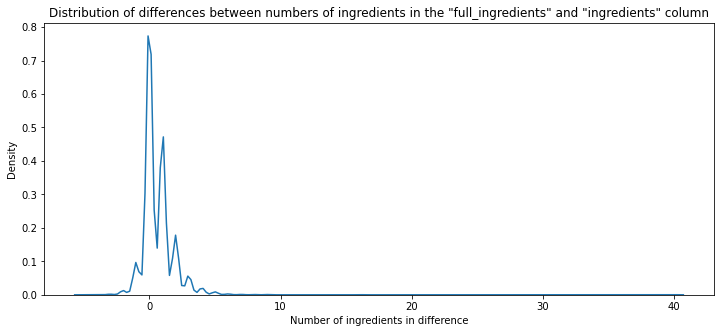

count    4724.000000
mean        0.622777
std         1.256429
min        -5.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        40.000000
dtype: float64

In [12]:
num_ingredients_difference = full_ingredients_check - ingredient_check
plt.figure(figsize=(12,5))
sns.kdeplot(num_ingredients_difference)
plt.title('Distribution of differences between numbers of ingredients in the "full_ingredients" and "ingredients" column')
plt.xlabel('Number of ingredients in difference')
plt.ylabel('Density')
plt.show()
num_ingredients_difference.describe()

Less than 80% of the recipes have no difference between the number of ingredients between the "ingredients" column and "full_ingredients". The remaining 20% are considered significant given our dataset size is not very big. Hence, we'll use the "full_ingredients" column for the NLP pipeline, though this feature will need more text cleaning.

In [13]:
# Transform cuisine and ingredients into a seperate table
df[["cuisine", "recipe", "full_ingredients"]].to_csv("cuisine_full_ingredients.csv", index=False)